<a href="https://colab.research.google.com/github/ViRoTex/Exercises-Statistics-R-and-Python/blob/main/09_Histogramas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramas con Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
births = pd.read_csv("/us-births.csv")

In [ ]:
births.shape

(15547, 5)

In [ ]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births.tail()

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


In [ ]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023
1974,1543005,1627626
1975,1535546,1618010
1976,1547613,1628863
1977,1623363,1708796


In [ ]:
births['decade'] = (births['year']//10)*10 # para trabajar por décadas

In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [ ]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [ ]:
%matplotlib inline 

In [ ]:
import seaborn as sb

In [ ]:
sb.set()

<Figure size 1080x576 with 0 Axes>

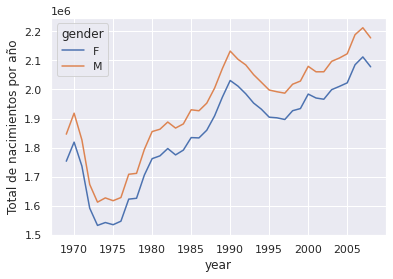

In [ ]:
plt.figure(figsize = (15,8))
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot()
plt.ylabel("Total de nacimientos por año")
plt.show()

In [ ]:
# para la limpieza de datos de NaN o valores mal escritos se puede hacer por quartiles
# de forma directa
quartiles = np.percentile(births['births'], [25,50,75]) # percentiles 25,50,75
quartiles

array([4358. , 4814. , 5289.5])

In [ ]:
# otra forma indirecta sería:
med = quartiles[1] # mediana
IQR = quartiles[2]-quartiles[0] # IQR, 
sig = 0.75*IQR

In [ ]:
# para filtrar dinámicamente podemos hacerlo de la siguiente manera:
births = births.query("(births > @med - 5*@sig) & (births < @med +5*@sig)") 

In [ ]:
births.shape # 14610 días, se han eliminado los días con datos anómalos

(14610, 6)

In [ ]:
births['day'] = births['day'].astype(int) # para convertir la columna día en número entero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [ ]:
births.index = pd.to_datetime (10000*births.year +100*births.month +births.day, format = "%Y%m%d") # pasa a ser un objeto de fecha pandas 

In [ ]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [ ]:
births['dayofweek'] = births.index.dayofweek # para ver el día de la semana correspondiente

In [ ]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


In [ ]:
births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = "mean")

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


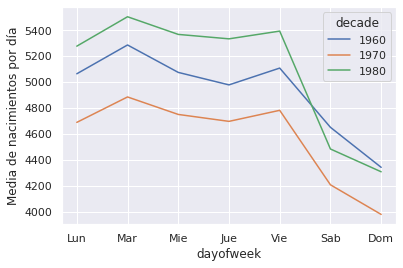

In [ ]:
births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc = "mean").plot()
plt.gca().set_xticklabels(['', 'Lun', 'Mar','Mie', 'Jue', 'Vie','Sab','Dom'])
plt.ylabel("Media de nacimientos por día")
plt.show()

In [ ]:
# ¿hay días más raros de tener un hijo?
births_by_date = births.pivot_table('births', index = [births.index.month, births.index.day], aggfunc = "mean")

In [ ]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [ ]:
# ¿qué pasa con los años bisiestos?por ejemplo, el año 2020
births_by_date.index = [pd.datetime(2020, month, day) for (month, day) in births_by_date.index]

In [ ]:
births_by_date.head()

,births
2020-01-01,4009.225
2020-01-02,4247.400
2020-01-03,4500.900
2020-01-04,4571.350
2020-01-05,4603.625


<Figure size 864x288 with 0 Axes>

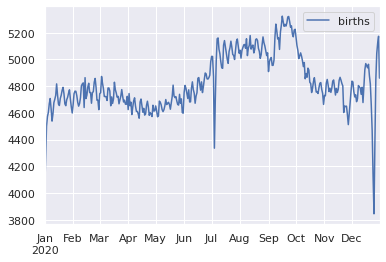

In [ ]:
plt.figure(figsize =(12,4))
births_by_date.plot()
plt.show()

# Histogramas en Python

## Histogramas en Python puro (sin usar ninguna librería)

In [ ]:
# vamos a crear un vector o array de datos
x = (0,1,1,1,2,2,3,7,7,7,25)

In [ ]:
# crear una función que creará una secuencia y devolverá un diccionario

def count_elements(seq)-> dict: 
  """
  Función que cuenta las frecuencias
  de aparición de cada elemento de la secuencia, 
  creando un diccionario como si fuese una 
  tabla de frecuencias
  """
  hist = {}
  for i in seq:
    hist[i] = hist.get(i,0) + 1
  return hist  

In [ ]:
fAbs = count_elements(x) # frecuencia absoluta

In [ ]:
fAbs # sería lo mismo que la función Counter que vemos a continuación

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [ ]:
from collections import Counter

In [ ]:
fAbs2 = Counter(x)

In [ ]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [ ]:
fAbs.items() == fAbs2.items()

True

In [ ]:
def ascii_histogram(seq) -> None:
  """
  Un histograma de frecuencias absolutas colocado en horizontal y con caracteres ASCII
  """
  fAbs = count_elements(seq)
  for k in sorted(fAbs):
    print('{0:5d}{1}'.format(k, '+'*fAbs[k]))

In [ ]:
ascii_histogram(x)

    0+
    1+++
    2++
    3+
    7+++
   25+


In [ ]:
import random
random.seed(2019)

In [ ]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [ ]:
data = [] # k para vals y v para freqs
for k,v in zip(vals, freqs):
  data.extend([k]*v)

In [ ]:
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [ ]:
ascii_histogram(data) # cada cruz indica una frecuencia, es un histograma manual

    1+++++++++
    2++++++++++++
    3++++++++++++++++++++
    5++++++++++
    7++++++++++++
    8++++++++++++
    9+++++++++++++++
   10++++++++++++++


## Histogramas con Numpy
Función histogram() de numpy

Ejemplo con la distribución de Laplace

In [ ]:
import numpy as np

In [ ]:
np.random.seed(2019)

In [ ]:
np.set_printoptions(precision = 3) # para imprimir nº de sólo 3 decimales

In [ ]:
x = np.random.laplace(loc = 10, scale =3, size = 1000) # distribución de Laplace, con media 10, escala 3, tamaño 1000

In [ ]:
x[:10] # 10 primeros

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [ ]:
hist, bin_edges = np.histogram(x)

In [ ]:
hist # frec. de cada una de las divisiones, son 10 divisiones de la misma amplitud

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [ ]:
bin_edges # divisiones

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [ ]:
hist.size, bin_edges.size # comprobamos que nos salen 10 divisones y 11 extremos 

(10, 11)

In [ ]:
min_edge = x.min() # para ver cómo construye numpy 
max_edge = x.max()

In [ ]:
n_bins = 10
bin_edges = np.linspace(start = min_edge, stop = max_edge, num = n_bins+1, endpoint = True)

In [ ]:
bin_edges # comprobamos que nos sale lo mismo

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [ ]:
x = (0,1,1,1,2,2,3,7,7,7,25) # vamos a ver otro ejemplo con bincount

In [ ]:
bcount = np.bincount(x)
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [ ]:
hist, _ = np.histogram(x, range = (0, max(x)), bins = max(x)+1) # hacemos lo mismo pero con histogram

In [ ]:
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [ ]:
np.array_equal(bcount, hist) # comprobamos que nos salen los mismos arrays por los 2 métodos

True

In [ ]:
# vamos a ver que también sería lo mismo con counter(), que vimos en histogramas a mano
# primero crearemos un diccionario
dict(zip(np.unique(x), bcount[bcount.nonzero()]))

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

# Visualización de Histogramas con Matplotlib y Pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(2019)
x = np.random.laplace(loc = 10, scale = 3, size = 1000)

Text(-10, 80, '$\\mu = 10, b = 3$')

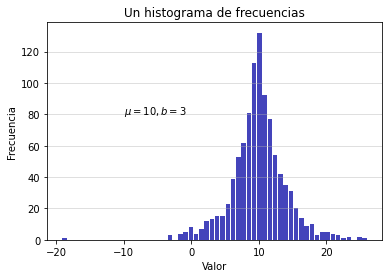

In [ ]:
n, bins, patches = plt.hist(x = x, bins = "auto", color = "#0505a5", alpha = 0.75, rwidth = 0.85)
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histograma de frecuencias")
plt.text(-10, 80, r'$\mu = 10, b = 3$')

In [ ]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [ ]:
bins

array([-19.16659894, -18.38652844, -17.60645795, -16.82638745,
       -16.04631696, -15.26624647, -14.48617597, -13.70610548,
       -12.92603498, -12.14596449, -11.365894  , -10.5858235 ,
        -9.80575301,  -9.02568251,  -8.24561202,  -7.46554153,
        -6.68547103,  -5.90540054,  -5.12533004,  -4.34525955,
        -3.56518906,  -2.78511856,  -2.00504807,  -1.22497757,
        -0.44490708,   0.33516341,   1.11523391,   1.8953044 ,
         2.6753749 ,   3.45544539,   4.23551588,   5.01558638,
         5.79565687,   6.57572736,   7.35579786,   8.13586835,
         8.91593885,   9.69600934,  10.47607983,  11.25615033,
        12.03622082,  12.81629132,  13.59636181,  14.3764323 ,
        15.1565028 ,  15.93657329,  16.71664379,  17.49671428,
        18.27678477,  19.05685527,  19.83692576,  20.61699626,
        21.39706675,  22.17713724,  22.95720774,  23.73727823,
        24.51734873,  25.29741922,  26.07748971])

In [ ]:
patches

<a list of 58 Patch objects>

(0.0, 140.0)

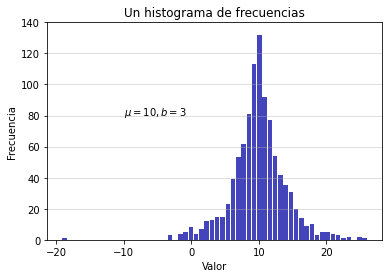

In [ ]:
# si quisiéramos un eje con una frecuencia diferente
n, bins, patches = plt.hist(x = x, bins = "auto", color = "#0505a5", alpha = 0.75, rwidth = 0.85)
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histograma de frecuencias")
plt.text(-10, 80, r'$\mu = 10, b = 3$')
maxfreq = n.max()
plt.ylim(ymax = np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq +10)

(0.0, 140.0)

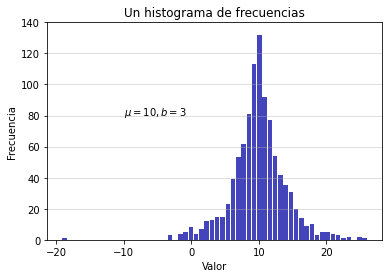

In [ ]:
# si quisiéramos bins con divisiones definidas por nosotros, sólo hay que poner un valor numérico
n, bins, patches = plt.hist(x = x, bins = 58, color = "#0505a5", alpha = 0.75, rwidth = 0.85)
plt.grid(axis = "y", alpha = 0.5)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Un histograma de frecuencias")
plt.text(-10, 80, r'$\mu = 10, b = 3$')
maxfreq = n.max()
plt.ylim(ymax = np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq +10)

In [ ]:
import pandas as pd

In [ ]:
size, scale = 1000, 10
data = pd.Series(np.random.gamma(scale, size = size))

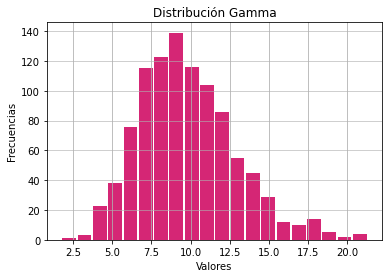

In [ ]:
data.plot.hist(grid = True, bins = 20, rwidth = 0.9, color = "#d52675")
plt.title("Distribución Gamma")
plt.xlabel("Valores")
plt.ylabel("Frecuencias")
plt.grid(axis = "y", alpha = 0.75)

# Funciones de densidad y de probabilidad

In [ ]:
mu = 10,20
sigma = 5,2
dist = pd.DataFrame(np.random.normal(loc = mu, scale = sigma , size = (1000, 2)), columns = ['x1', 'x2'])

In [ ]:
dist.agg(['min', 'max', 'mean', 'std']).round(decimals = 2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


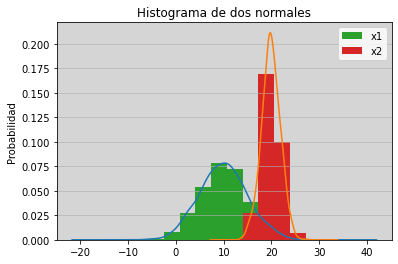

In [ ]:
fig, ax = plt.subplots()
dist.plot.kde(ax = ax, legend = False, title = "Histograma de dos normales")
dist.plot.hist(density = True, ax = ax)
ax.set_ylabel("Probabilidad")
plt.grid(axis = "y", alpha = 0.75)
ax.set_facecolor("#d5d5d5")

In [ ]:
from scipy import stats 

In [ ]:
dist = stats.norm() # distribución normal teórica N(0,1) - exp(-x**2/2)/sqrt(2*pi)

In [ ]:
sample = dist.rvs(size = 1000)

In [ ]:
stats.norm.ppf(0.01)

-2.3263478740408408

In [ ]:
stats.norm.ppf(0.99)

2.3263478740408408

In [ ]:
x = np.linspace(start = stats.norm.ppf(0.01), stop = stats.norm.ppf(0.99), num=250)

In [ ]:
gkde = stats.gaussian_kde(dataset = sample)

Text(-2.0, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2\\pi}}$')

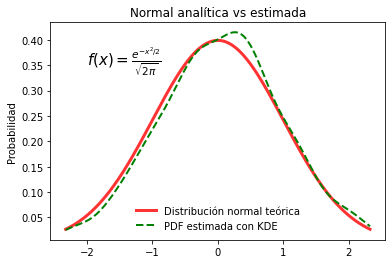

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x), linestyle = "solid", c = "red", lw = 3, alpha = 0.8, label = "Distribución normal teórica")
ax.plot(x, gkde.evaluate(x), linestyle = "dashed", c = "green", lw = 2, label = "PDF estimada con KDE")
ax.legend(loc= "best", frameon = False)
ax.set_title("Normal analítica vs estimada")
ax.set_ylabel("Probabilidad")
ax.text(-2., 0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$', fontsize = 15)

## Histogramas con Seaborn

In [ ]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


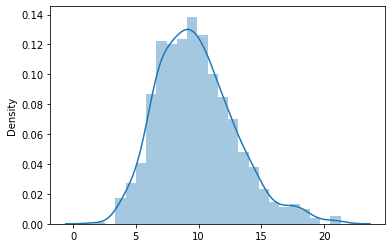

In [ ]:
sb.distplot(data) # ejemplo con data que creamos anteriormente

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


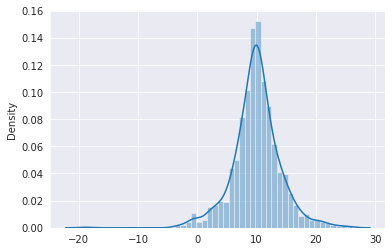

In [ ]:
# otro ejemplo con la dist. de laplace de antes
np.random.seed(2019)
x = np.random.laplace(loc = 10, scale = 3, size = 1000)
sb.set_style("darkgrid")
sb.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


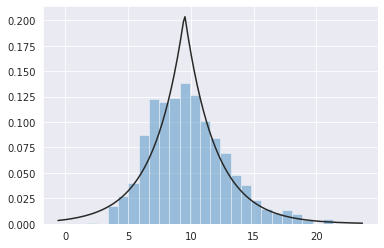

In [ ]:
# estimación de parámetros con el ejemplo de data 
# hacemos que se ajuste a una distribución de laplace
sb.distplot(data, fit = stats.laplace, kde = False)

### Otras formas

In [ ]:
data2 = np.random.choice(np.arange(10), size = 10000, p = np.linspace(1,11,10)/60) # conjunto de datos

In [ ]:
s = pd.Series(data2) # convertimos en objeto series de pandas

In [ ]:
# calcula el histograma de valores no nulos a partir del objeto series
s.value_counts() # obtenemos el valor de las frecuencias absolutas


9    1840
8    1622
7    1478
6    1276
5    1050
4     909
3     781
2     537
1     361
0     146
dtype: int64

In [ ]:
s.value_counts(normalize = True) # obtenemos las frecuencias relativas

9    0.1840
8    0.1622
7    0.1478
6    0.1276
5    0.1050
4    0.0909
3    0.0781
2    0.0537
1    0.0361
0    0.0146
dtype: float64

In [ ]:
# divisiones en intervalos arbitrarios
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])
bins= (0,10,15,18,21,np.inf) # intervalos 
labels = ('infancia', 'preadolescencia','adolescencia', 'universitario', 'adulto')
groups = pd.cut(ages, bins= bins, labels = labels)


In [ ]:
groups

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12       adolescencia
13      universitario
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): ['infancia' < 'preadolescencia' < 'adolescencia' < 'universitario' <
                         'adulto']

In [ ]:
groups.value_counts() # sirve este análisis tanto para datos numéricos, datos cuantitativos agrupados como los factores ordenados de acuerdo a categorías o datos ordinales

infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
dtype: int64

In [ ]:
# para concatenar las edades y los grupos
pd.concat((ages, groups), axis = 1).rename(columns = {0:'age', 1:'group'})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia
